# Amerykańska wojna o niepodległość - bitwy

Dane zawierają listę starć podczas wojny o niepodległość z miejscem bitwy, datą (mm/dd/yyyy) i nazwą stanu. Dane mogą zawierać wartości w puste kolumnach 'Start Date' i 'State'. Plik z danymi pochodzi z (bardzo dobrej!) książki "Pandas in Action", autorstwa Borisa Paskhavera, wydanej w tym roku (2021) przez Manning i można go pobrać ze strony wydawnictwa.  

In [1]:
import numpy as np
import pandas as pd

## Ogólne informacje o zbiorze danych

In [21]:
df = pd.read_csv("revolutionary_war.csv", 
                  parse_dates=["Start Date"]
                 )

In [22]:
df

,Battle,Start Date,State
0,Powder Alarm,1774-09-01,Massachusetts
1,Storming of Fort William and Mary,1774-12-14,New Hampshire
2,Battles of Lexington and Concord,1775-04-19,Massachusetts
3,Siege of Boston,1775-04-19,Massachusetts
4,Gunpowder Incident,1775-04-20,Virginia
...,...,...,...
227,Siege of Fort Henry,1782-09-11,Virginia
228,Grand Assault on Gibraltar,1782-09-13,NaN
229,Action of 18 October 1782,1782-10-18,NaN
230,Action of 6 December 1782,1782-12-06,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Battle      232 non-null    object        
 1   Start Date  228 non-null    datetime64[ns]
 2   State       162 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 5.6+ KB


Plik zawiera 232 rekordy dotyczące bitew, informacji o dacie brakuje w 4 przypadkach, informacji o nazwie stanu w którym odbyło się starcie - w 70 przypadkach, 160 rekordów zawiera pełne informacje.

## Liczba starć w poszczególnych stanach

In [16]:
battles = pd.read_csv("revolutionary_war.csv", 
                  index_col="Start Date", 
                  parse_dates=["Start Date"],
                  usecols=["Start Date", "State"],
                  squeeze=True
                 )

battles

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 232, dtype: object

In [102]:
battles.dropna().sort_values().value_counts().head(17)

South Carolina    31
New York          28
New Jersey        24
Virginia          21
Massachusetts     11
Pennsylvania      10
North Carolina     9
Florida            8
Georgia            6
Connecticut        3
Vermont            3
Rhode Island       3
Indiana            1
Ohio               1
Louisiana          1
Delaware           1
New Hampshire      1
Name: State, dtype: int64

In [108]:
battles_count = battles.dropna().sort_values().value_counts()

0

In [75]:
# pliki z mapą USA można pobrać ze strony: 
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
usa_file = "cb_2018_us_state_20m.shp"

import matplotlib.pyplot as plt
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [82]:
states = geopandas.read_file(usa_file)

In [93]:
# zmiana układu odniesienia na Mercator
states = states.to_crs("EPSG:3395")

# wykluczenie Alaski, Hawajów i Puerto Rico
not_mainland = ['Alaska', 'Hawaii', "Puerto Rico"]
mainland_usa = states.query('NAME not in @not_mainland')

# battles
mainland_usa["battles"] = mainland_usa['NAME'].apply(lambda x: battles_count.get(x, 0))

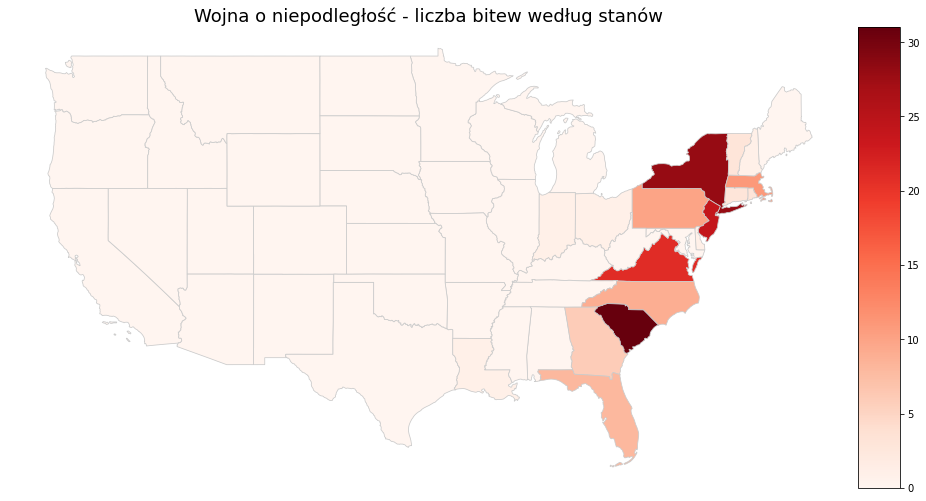

In [135]:
# mapa
fig, ax = plt.subplots(1, figsize  = (16, 10))
ax.axis('off')
ax.set_title('Wojna o niepodległość - liczba bitew według stanów',fontdict={'fontsize': '18','fontweight':'3'})

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

mainland_usa.plot(ax=ax, column='battles', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, cax=cax);

Większość bitew, dla których dysponujemy danymi dotyczącymi nazwy stanu, w którym bitwa miała miejsce odbyła się w jednym z czterech stanów: South Carolina, New York, New Jersey, Virginia.

## Bitwy według dni tygodnia

In [47]:
from datetime import datetime

battles_all = pd.read_csv("revolutionary_war.csv",  
                  parse_dates=["Start Date"]
                 )

def dayweek(day):
    return day.strftime("%A")

series_date = battles_all.iloc[:,1]
series_date.dropna().apply(dayweek).value_counts()

Friday       39
Saturday     39
Wednesday    32
Thursday     31
Sunday       31
Tuesday      29
Monday       27
Name: Start Date, dtype: int64

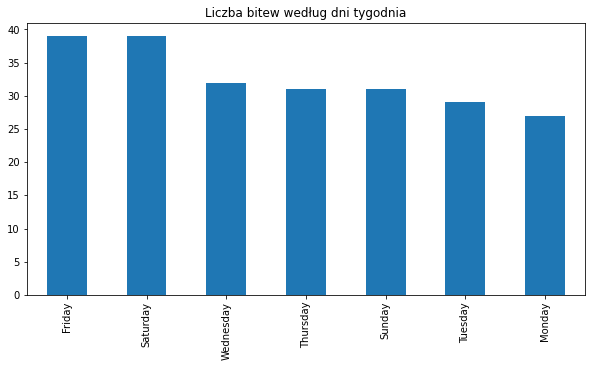

In [67]:
tmp = series_date.dropna().apply(dayweek).value_counts()
tmp.plot.bar(title='Liczba bitew według dni tygodnia', figsize=(10,5));

Jak widać podczas wojny o niepodległość bitwy rozpoczynały się najczęściej w piątek i sobotę, najrzadziej zaś w poniedziałek.

## Bitwy według miesięcy

In [54]:
def month(day):
    return day.strftime("%B")

series_date.dropna().apply(month).value_counts()

September    32
August       28
May          24
July         20
April        19
October      18
March        17
June         16
December     15
January      15
February     12
November     12
Name: Start Date, dtype: int64

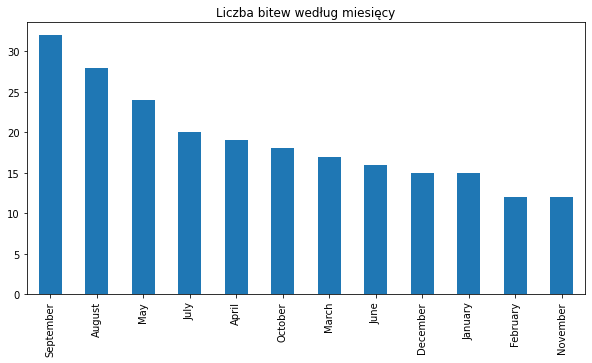

In [72]:
tmpm = series_date.dropna().apply(month).value_counts()
tmpm.plot.bar(title='Liczba bitew według miesięcy', figsize=(10,5));

W miesiącach zimowych (listopad, grudzień, styczeń, luty) bitwy zdarzały się najrzadziej, z kolei maj, lipiec, sierpień i wrzesień to miesiące z najliczniejszymi starciami. 

## Bitwy według lat

In [51]:
def year(day):
    return day.strftime("%Y")

series_date.dropna().apply(year).value_counts()

1781    38
1780    35
1782    31
1777    31
1779    27
1778    26
1776    22
1775    15
1774     2
1783     1
Name: Start Date, dtype: int64

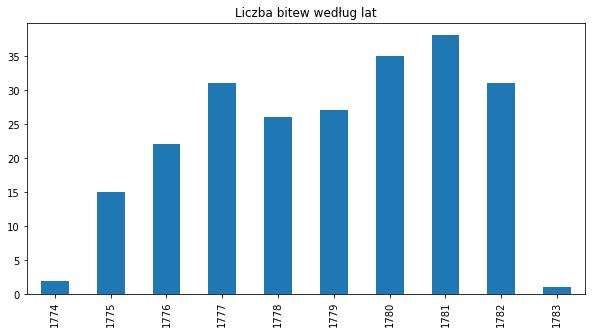

In [70]:
tmpy = series_date.dropna().apply(year).value_counts().sort_index()
tmpy.plot.bar(title='Liczba bitew według lat', figsize=(10,5));

W latach 1774 - 1783 stoczono 228 bitew - uwzględniając tylko te, dla których mamy daty początku bitwy. Blisko połowa (104) miała miejsce w ciągu 3 lat: 1780-1782.